<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%203/Le%C3%A7on_3_Demo_rotTF.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Représentation fréquentielle

## Démo : Démonstration des propriétés élémentaires de la TF 2D

### Référence : DIP 4e édition, Chapitre 4, Section 4.6

Dans ce démo, des transformées de Fourier discrètes (TFD) 2D d’images seront obtenues et le module (abs()) du spectre centré (np.fft.fftshift()) sera visualisé. Deux propriétés de la TFD-2D seront mises de l’avant.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,8)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Exemple 1

**TF d’une fonction *box* 2D :** La TF d’une fonction *box* 2D correspond à la multiplication de 2 fonctions sinc (sinus cardinal). Comme en 1D, pour une dimension donnée, plus la fonction box est large, plus l’intervalle est petit entre les zéros du sinc du spectre. Ainsi dans cet exemple, les zéros sont plus rapprochés dans la dimension horizontale.

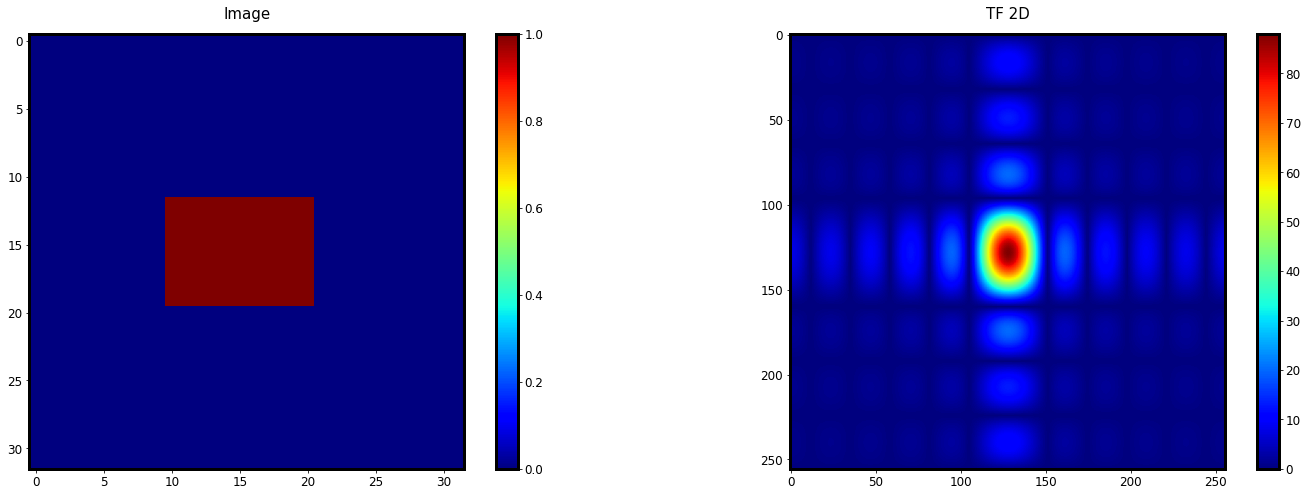

In [2]:
N = 32
f = np.zeros((N, N))
f[int(3*N/8):int(5*N/8), int(N/3):int(2*N/3)] = 1;

F = np.fft.fft2(f, (8*N, 8*N));

plt.subplot(121); plt.imshow(f, cmap='jet'); plt.colorbar(); plt.title('Image')
plt.subplot(122); plt.imshow(np.abs(np.fft.fftshift(F)), cmap='jet'); plt.colorbar(); plt.title('TF 2D')
plt.show()

## Exemple 2

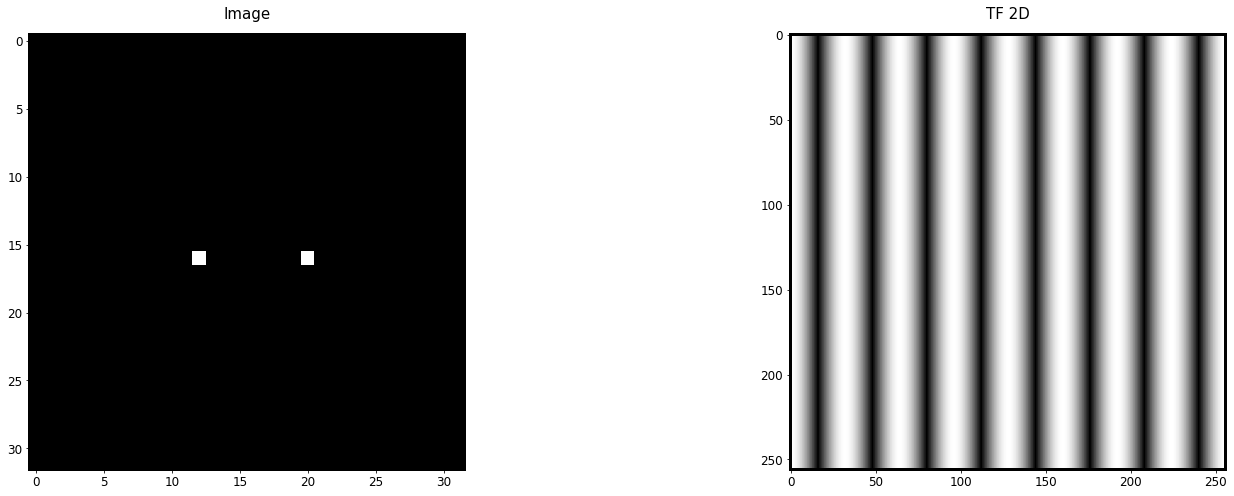

In [3]:
f = np.zeros((N, N))
f[int(N/2), int(3*N/8)] = 1;
f[int(N/2), int(5*N/8)] = 1;

F = np.fft.fft2(f, (8*N, 8*N));

plt.subplot(121); plt.imshow(f, cmap='gray'); plt.title('Image')
plt.subplot(122); plt.imshow(np.abs(np.fft.fftshift(F)), cmap='gray'); plt.title('TF 2D')
plt.show()

## Exemple 3 : Rotation

Le *slider* ci-dessous permet de contrôler l’angle de rotation de l’image de l’exemple 2. Effectuer une rotation de $\theta \degree$ d’une image entraîne une rotation de $\theta \degree$ degré du module du spectre de sa TF.

In [4]:
def rotation(angle):
    N=128
    deltax = np.round(N/8*np.cos(angle))
    deltay = np.round(N/8*np.sin(angle))
    f = np.zeros((N, N))
    f[int(N/2-deltay), int(N/2-deltax)] = 1
    f[int(N/2+deltay), int(N/2+deltax)] = 1
    F = np.fft.fftshift(np.fft.fft2(f, (2*N, 2*N)))
    F = F[int(3*N/4):int(5*N/4), int(3*N/4):int(5*N/4)];
    plt.subplot(121); plt.imshow(f, cmap='gray'); plt.title('Image')
    plt.subplot(122); plt.imshow(np.abs(F), cmap='gray'); plt.title('TF 2D')
    plt.show()

In [5]:
interactive(rotation, angle=(0,np.pi/2,np.pi/40))

interactive(children=(FloatSlider(value=0.7853981633974483, description='angle', max=1.5707963267948966, step=…